In [1]:
from pathlib import Path
dataset_folder = Path.home()/'trainset_astera_5hops_nocomp'

funcs_csv = Path('/home/cls0027/exp_builds/astera.exp/rundata/run1/0.fighter/functions.csv')
locals_csv = Path('/home/cls0027/exp_builds/astera.exp/rundata/run1/0.fighter/locals.csv')

import pandas as pd
pd.set_option('display.max_colwidth', 20)   # JSON columns make things look weird in notebook without this

funcs_df = pd.read_csv(funcs_csv)
locals_df = pd.read_csv(locals_csv)

In [2]:
ast_file = funcs_df.iloc[33].AstJson_Strip

import astlib
ast = astlib.read_json(ast_file)

In [3]:
funcs_df.iloc[33]
locals_df[locals_df.FunctionStart==1344326]

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,Type_Debug,LocType_Debug,LocRegName_Debug,LocOffset_Debug,TypeCategory_Debug,TypeSeq_Debug,HasDWARF,TypeJson_Debug,BinaryId
198,1344326,"347,454,457,475,...",puVar1,uint64*,unique,NaN,268435773,PTR,"PTR,uint64",NaN,NaN,NaN,NaN,NaN,COMP,COMP,False,NaN,0
199,1344326,"44,49",cVar2,char,register,al,0,BUILTIN,char,uVar3,uchar,register,al,0.0,BUILTIN,uchar,False,"{""kind"": ""Builti...",0
200,1344326,"560,572",uVar3,ushort,register,ax,0,BUILTIN,ushort,uVar4,ushort,register,ax,0.0,BUILTIN,ushort,False,"{""kind"": ""Builti...",0
201,1344326,"378,454",local_a8,uint64,stack,NaN,-168,BUILTIN,uint64,NaN,NaN,NaN,NaN,NaN,COMP,COMP,False,NaN,0
202,1344326,457,local_a0,uint64,stack,NaN,-160,BUILTIN,uint64,NaN,NaN,NaN,NaN,NaN,COMP,COMP,False,NaN,0
203,1344326,475,local_98,uint64,stack,NaN,-152,BUILTIN,uint64,NaN,NaN,NaN,NaN,NaN,COMP,COMP,False,NaN,0
204,1344326,479,local_90,uint64,stack,NaN,-144,BUILTIN,uint64,NaN,NaN,NaN,NaN,NaN,COMP,COMP,False,NaN,0
205,1344326,491,local_88,uint64,stack,NaN,-136,BUILTIN,uint64,NaN,NaN,NaN,NaN,NaN,COMP,COMP,False,NaN,0
206,1344326,495,local_80,uint64,stack,NaN,-128,BUILTIN,uint64,NaN,NaN,NaN,NaN,NaN,COMP,COMP,False,NaN,0
207,1344326,507,local_78,uint64,stack,NaN,-120,BUILTIN,uint64,NaN,NaN,NaN,NaN,NaN,COMP,COMP,False,NaN,0


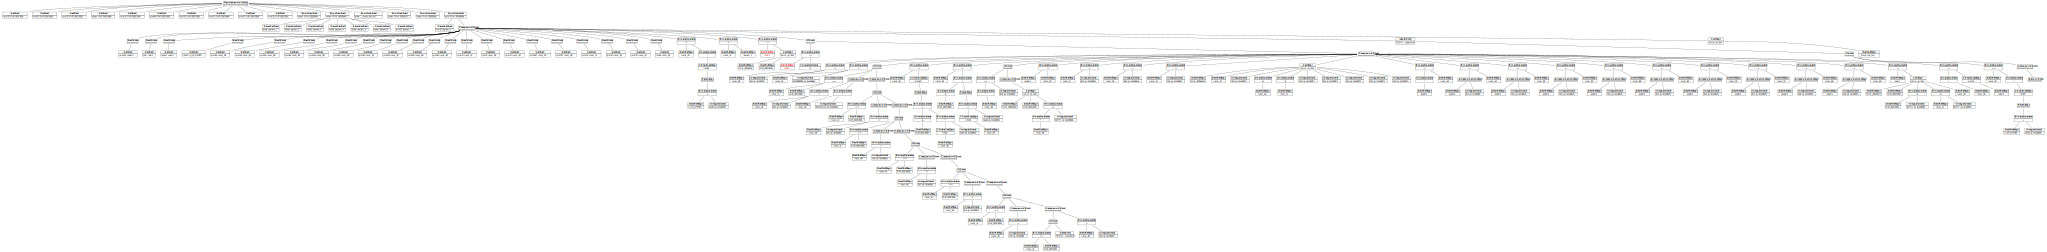

In [4]:
from astlib.color_ast import highlight_var_refs
# ast.render()
ast.render(format_node=highlight_var_refs('cVar2'))

In [5]:
# ast.render()

from datatype_recovery.models.dataset import VariableGraphBuilder

neighborhood = VariableGraphBuilder('cVar2', ast).build_variable_graph_astlib(max_hops=2)
neighborhood

In [6]:
# DeclRefExpr's only are connected via an "UP" edge to the parent
# --> find which nodes in the neighborhood should have the additional
#     edges rendered

# dre = neighborhood[2].inner[0]
# dre.referencedDecl.name
VARNAME = 'cVar2'

# this will include the node who is already the parent of declref
needs_edge_to_declref = []

for n in neighborhood[1:]:
    for x in n.inner:
        if x.kind == 'DeclRefExpr' and x.referencedDecl.name == VARNAME:
            needs_edge_to_declref.append(n)
            break   # move on to next node in neighborhood

needs_edge_to_declref

**pick up here**

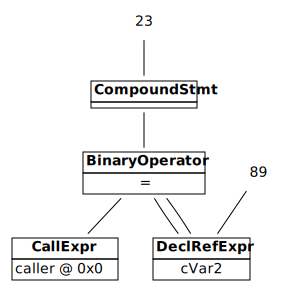

In [9]:
from astlib import VariableGraphViewer

# -----------------------------------------------
# TODO: PICK UP HERE
# -----------------------------------------------

# TODO: highlight nodes in the neighborhood with format_node

vgv = VariableGraphViewer(neighborhood, render_khop=2, format_node=None)
vgv.render_vargraph()

In [8]:
def do_highlight_khop(node, attrs):
    if hasattr(node, 'khop_neighbor'):
        attrs.font_color = 'red'

neighborhood[0].render(khop=2, format_node=do_highlight_khop)
len(neighborhood)

TypeError: render() got an unexpected keyword argument 'khop'

In [ ]:
neighborhood[0].parent.parent.khop_neighbor

AttributeError: 'CompoundStmt' object has no attribute 'khop_neighbor'